# Задание 1
* 1.1 Генерация линейных, полиномиальных и других зависимостей, отличных от тех, что в примере (минимум 3 шт)
* 1.2 Проверить, как справляются полиномы разных степеней и разные типы регуляризации

In [962]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Пример

### Data generation

In [963]:
# Data generation

def true_fun(x, a=np.pi, b = 0, f=np.sin):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)
    
    if f is None: f = lambda x:x # line
    x = np.sum([ai*np.power(x, i+1) for i,ai in enumerate(a)],axis=0)

    return f(x+ b)

def noises(shape , noise_power):
    return np.random.randn(*shape) *noise_power

def dataset(a, b, f = None,  N = 250, x_max =1, noise_power = 0, random_x = True,  seed = 42):
    np.random.seed(seed)
    
    if random_x:
        x = np.sort(np.random.rand(N))*x_max    
    else:
        x = np.linspace(0,x_max,N)
    
    y_true = np.array([])
    
    for f_ in np.append([], f):
        y_true=np.append(y_true, true_fun(x, a, b, f_))
    
    y_true = y_true.reshape(-1,N).T
    y = y_true + noises(y_true.shape , noise_power)

    return y, y_true, np.atleast_2d(x).T

In [964]:
# Data visualization
def vis_data(y, y_true,x, title):
    fig  = plt.figure(figsize=(10,5))
    plt.scatter(x[:,0], y, edgecolor='b', label="Зашумленные Данные",s=196, alpha = 0.6)
    plt.scatter(x[:,0], y_true,label="Реальные Данные", s=81,c='g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x',fontsize=25)
    plt.ylabel('y',fontsize=25)
    plt.legend(fontsize=10)
    plt.title(title, fontsize=15 )
    plt.tight_layout()

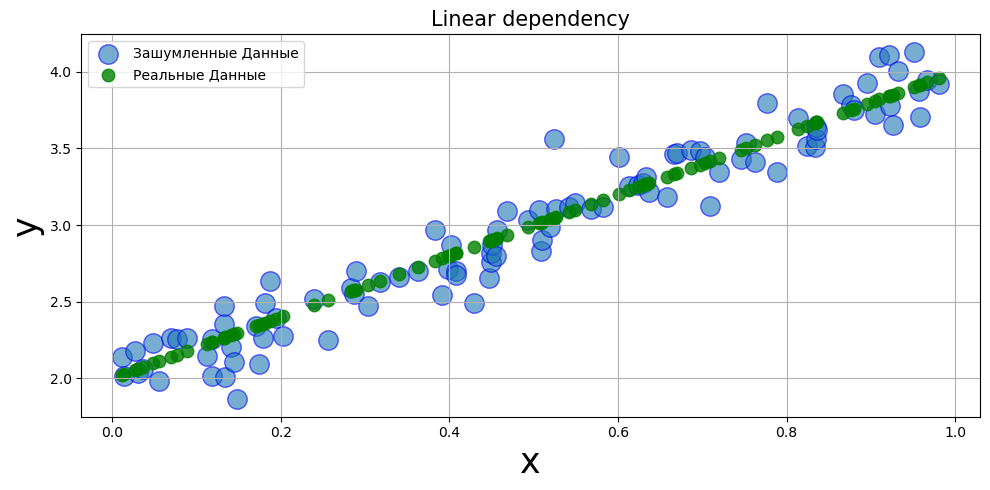

In [965]:
noise_power = 0.15

y, y_true, x = dataset(a = 2, b = 2,
                       f = None,  N = 100,
                       x_max =1, 
                       noise_power = noise_power,
                       seed = 40)
vis_data(y, y_true, x, title='Linear dependency')

### Initializations

In [966]:
# Train func initialize
def train_test_split(x,y, train_size=None, test_size=None, random_state=42, shuffle=True,):
    if random_state: np.random.seed(random_state)
    
    size = y.shape[0]
    idxs = np.arange(size)
    if shuffle: np.random.shuffle(idxs)
    
    if test_size and train_size is None:
        if (test_size<= 1):  train_size = 1 - test_size
        else:  train_size = size - test_size
        test_size = None    
        
    if train_size is None or train_size > size: train_size = size
        
    if (train_size<= 1): train_size *= size
        
    if test_size is not None: 
        if test_size<= 1: test_size *= size    
        if test_size>size: test_size = size-train_size
    else: test_size = 0

    x_train, y_train = x[idxs[:int(train_size)]], y[idxs[:int(train_size)]]
    x_val,   y_val   = x[idxs[int(train_size):size - int(test_size)]], y[idxs[int(train_size):size - int(test_size)]]
    
    if test_size > 0:
        x_test, y_test = x[idxs[size - int(test_size):]], y[idxs[size - int(test_size):]]
        return x_train, y_train.squeeze(), x_val, y_val.squeeze(), x_test, y_test.squeeze() 
    return x_train, y_train.squeeze(), x_val, y_val.squeeze()


x_train, y_train, x_val, y_val, x_test, y_test = train_test_split(x, y, train_size = 0.5, test_size=0.3, )    
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape,  x_test.shape, y_test.shape )

    
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, )    
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(50, 1) (50,) (20, 1) (20,) (30, 1) (30,)
(70, 1) (70,) (30, 1) (30,)


In [967]:
# Weights func initialize
def init_weights(W_shape, add_bias = True, random_state = 42):
    W_shape = np.atleast_1d(W_shape)
    if random_state: 
        np.random.seed(random_state)
    W = np.random.randn(*list(W_shape))/np.sqrt(np.sum(W_shape))    
    if add_bias: 
        W = np.column_stack((np.zeros(W.shape[-1]),W ))
    return W.squeeze()

In [968]:
# Prediction func initialize
def predict( X, W, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]),X))
    else:
        X_full = X
    return  np.dot(X_full,W)

def loss_func(yhat, y):
    return np.square(yhat - y)  

In [969]:
# Gradient loss init
def grad_loss(y_hat, y, X, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]),X))
    else:
        X_full = X
    return 2*np.dot(X_full.T, (y_hat - y)) / y.size 

In [970]:
# Update init
def update_weights(grad, W, learning_rate):
    return W - learning_rate*grad

### Init test

In [971]:
x_train[:1]

array([[0.83530018]])

In [972]:
weights = init_weights(x.shape[1])
yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y[0])

print(f'{weights}')
print(f'predict {yhat},\nground truth {y[0]},\nloss: {loss}')

[0.         0.49671415]
predict [0.41490542],
ground truth [2.14209451],
loss: [2.98318214]


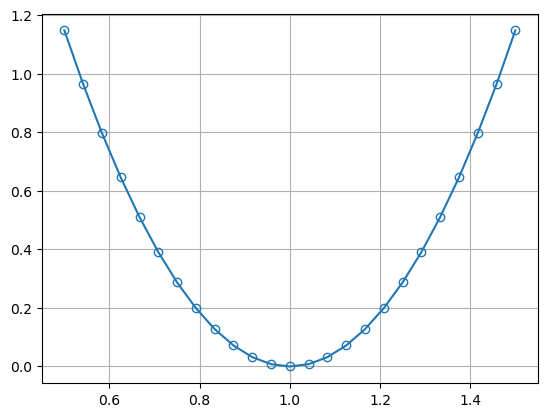

In [973]:
decline = np.linspace(start = 0.5, stop = 1.5,num = 25)
yhat = decline* y[0]
loss = loss_func(yhat, y[0])
plt.plot(decline,loss,'-o', mfc = 'none'); plt.grid();

In [974]:
yhat = predict(x_train[0], weights)

grad = grad_loss(yhat, y[0], x[0])
print(grad)

[-3.45437818 -0.04173628]


In [975]:
learning_rate = 0.1
weights = update_weights(grad, weights, learning_rate)
print(weights)

[0.34543782 0.50088778]


In [976]:
yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y[0])

print(f'{weights}')
print(f'predict {yhat},\nground truth {y[0]},\nloss: {loss}')

[0.34543782 0.50088778]
predict [0.76382947],
ground truth [2.14209451],
loss: [1.89961452]


### Learning funcs initialization

In [977]:
def fit(X, y, learning_rate, weights = None,  epochs=30):

    if weights is None: weights = init_weights(X.shape[1])
    cost    = np.zeros(epochs)

    for i in range(epochs): 
        yhat    = predict(X,weights)
        grad    = grad_loss(yhat,  y, X) 
        weights = update_weights(grad, weights, learning_rate)  
        cost[i] = loss_func(yhat,  y).mean()
                
    return weights, cost

In [978]:
# Test
weights, cost = fit(x_train, y_train, learning_rate=0.1, epochs=10)

In [979]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 2, markersize = 6); 
    plt.grid()
    plt.xlabel("Эпоха",fontsize=20)
    plt.ylabel("Функция Потерь",fontsize=20)

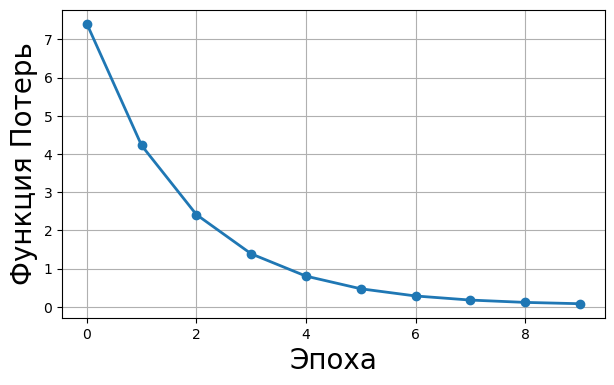

In [980]:
# Test
fig  = plt.figure(figsize=(7,4))

plot_cost(cost)

In [981]:
#Quadro loss
def r2_score(yhat, y):    
    return 1-(np.square(y-yhat)).sum(axis=0)/(np.square(y-np.mean(y, axis=0))).sum(axis=0)

In [982]:
predicts = predict( x_test,weights,)

r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.7792374327882301, 0.8333796530354662)

In [983]:
def plot_model_weights(x_train, y_train, x_test, x, y, weights):
    plt.plot(x_train[:,0], predict(x_train,weights, ),
            '.', label='Предсказание на x_train',
            markersize = 8)
    plt.plot(x_test[:,0], predict(x_test,weights, ),
            'o', label='Предсказание на x_test',
            markersize = 8, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=1,c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные Значения", linewidth=2,c='g')
    plt.legend(fontsize=10); plt.grid()
    plt.xlabel('x',fontsize=15)
    plt.ylabel('y',fontsize=15);

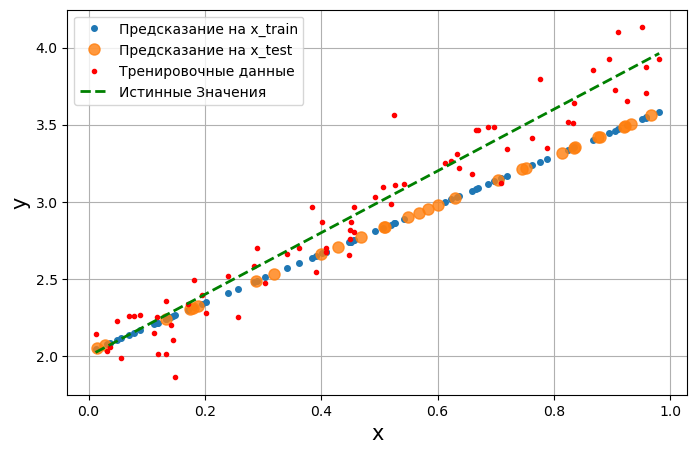

In [984]:
#Test
fig  = plt.figure(figsize=(8,5))

plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

In [985]:
weights

array([2.02961615, 1.58316532])

In [986]:
# Хз зачем, но пусть будет
def vis_weigths(weights):
    numbers = np.arange(0,len(weights))
    tick_labels = ['w'+str(num) for num in numbers]
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels );

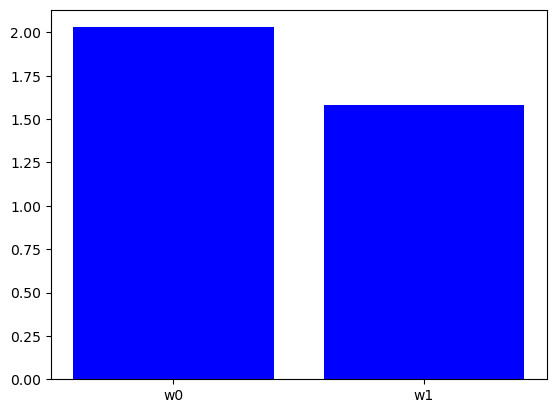

In [987]:
vis_weigths(weights)

In [988]:
# load bit of data init
def load_batch(X,y, batch_size = 100):
    idxs = np.arange(y.size)
    np.random.shuffle(idxs)

    for i_batch in range(0,y.size,batch_size):
        idx_batch = idxs[i_batch:i_batch+batch_size]
        x_batch   = np.take(X, idx_batch,axis=0)
        y_batch   = np.take(y, idx_batch)
        yield  x_batch, y_batch

In [989]:
BATCH = 10

def fit_SGD(X, y, lerning_rate, weights = None,  epochs=30, batch_size = 100, random_state = 42):
    
    if random_state: np.random.seed(random_state)

    if weights is None: weights = init_weights(X.shape[1])
    if batch_size is None or batch_size>y.size : batch_size = y.size
    n_batches = y.size//batch_size
    
    cost    = np.zeros(epochs)

    for i in range(epochs): 
        loss = 0
        for cnt,(x_batch, y_batch) in enumerate(load_batch(X,y, batch_size)): 

            yhat    = predict(x_batch, weights)
            grad    = grad_loss(yhat,  y_batch, x_batch) 
            weights = update_weights(grad, weights, lerning_rate) #backward 
            loss   += loss_func(yhat,  y_batch).mean()

            if cnt>= n_batches:
                break
        cost[i] = loss/n_batches

    return weights, cost

In [990]:
weights = init_weights(x_train.shape[1], random_state=42)

weights, cost = fit_SGD(x_train, y_train, lerning_rate=0.1, batch_size = 10,  epochs=10)

predicts = predict(x_test, weights, )
r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.9347020069670812, 0.9277429164701589)

In [991]:
weights

array([2.06655734, 1.84188514])

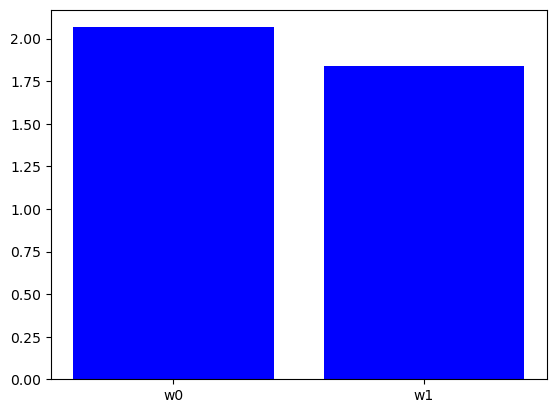

In [992]:
# Опять выводим для тех, кто плохо понимает цифры..
vis_weigths(weights)

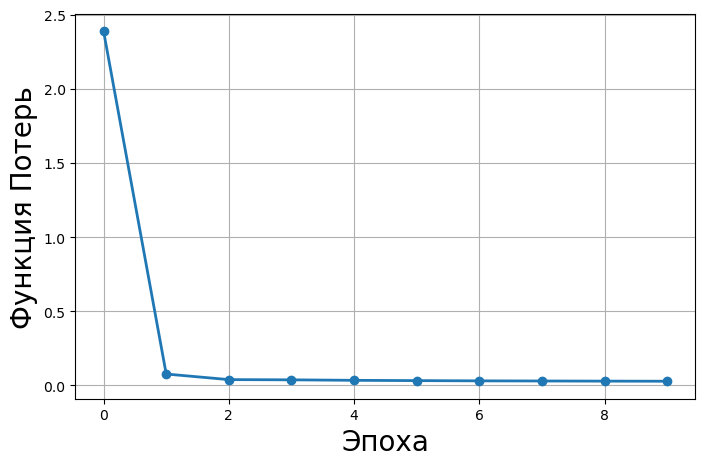

In [993]:
fig  = plt.figure(figsize=(8,5))

plot_cost(cost)

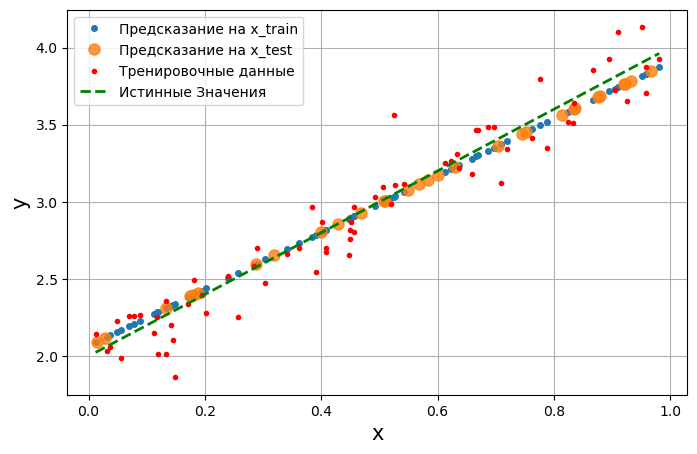

In [994]:
fig  = plt.figure(figsize=(8,5))

plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

Это было близко

### Final!!! LinReg class

In [995]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        self.n_batches = n_batches
        
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))
    
    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            self.batch_size = y.size
            
        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size
            
        for i in range(self.epochs): 
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)): 

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
                self.weights = self.update() 
                loss += self.loss(yhat,  y_batch)
                
                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches
        
        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

baldeeej

### Polinom reg init

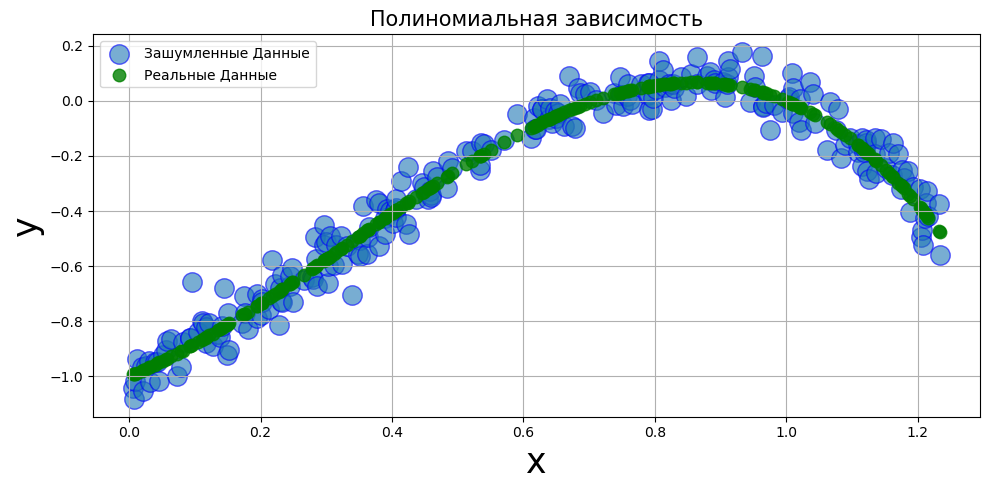

In [996]:
noise_power = 0.06

y, y_true, x = dataset(a = [1,2,-2], b = -1,
                       f = None,  N = 250,
                       x_max =1.25, 
                       noise_power = noise_power,
                       seed = 42)
vis_data(y, y_true,x, 'Полиномиальная зависимость')

In [997]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, ) 

In [998]:
regr_poly_lin = LinearRegression(learning_rate=0.1,
                        epochs=10,batch_size=10,
                        n_batches=None)
regr_poly_lin.fit(x_train, y_train)

In [999]:
def plot_model_class(x_train, y_train, x_test, x, y, model):
    plt.plot(x_train[:,0], model.predict(x_train),
            '.', label='Предсказание на x_train',
            markersize = 7)
    plt.plot(x_test[:,0], model.predict(x_test),
            'o', label='Предсказание на x_test',
            markersize = 7, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2,c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные Значения", linewidth=4,c='g')
    plt.legend(fontsize=10); plt.grid()
    plt.xlabel('x',fontsize=25)
    plt.ylabel('y',fontsize=25);

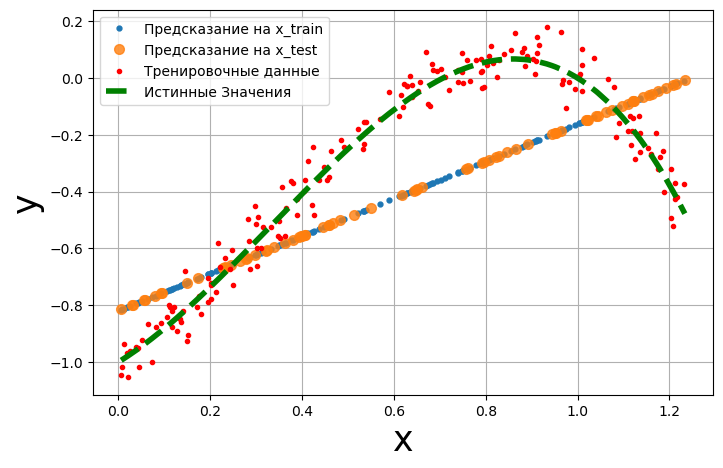

In [1000]:
fig  = plt.figure(figsize=(8,5))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly_lin)

Видим, что такие данные плохо описывает наша линейная регрессия

In [1001]:
# polinom init
def to_polynom(x, order = 1, add_bias = False):
    order_range = range( 0 if add_bias else 1, order+1,1)
    x = np.atleast_1d(x)[:]    
    out = np.array([])
    for i in order_range:
        out = np.append(out, np.power(x,i))
    return out.reshape(-1, x.size).T

In [1002]:
x_ = to_polynom(x, order = 5) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

In [1003]:
regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

In [1004]:
regr_poly.fit(x_train, y_train)

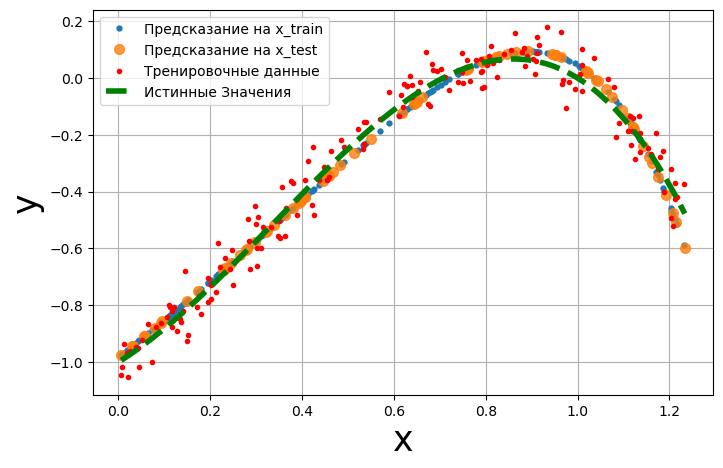

In [1005]:
fig  = plt.figure(figsize=(8,5))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

baldeeej

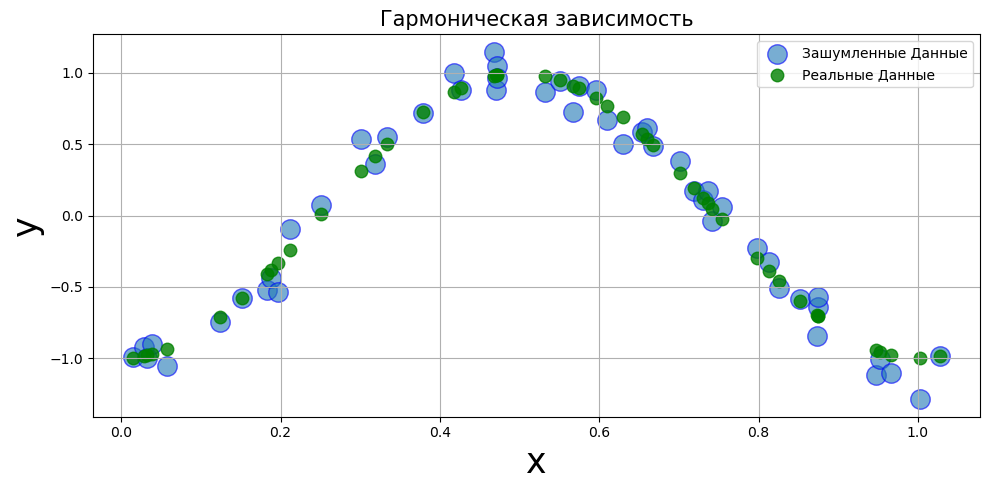

In [1006]:
# Garmonia data
y, y_true, x = dataset(a = 2*np.pi,
                       b = np.pi, f = np.cos,  
                       N = 50, x_max =np.pi/3, 
                       noise_power = 0.1, seed = 40)
vis_data(y, y_true,x, 'Гармоническая зависимость')

In [1007]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, )    
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(35, 1) (35,) (15, 1) (15,)


Train Score = -0.00


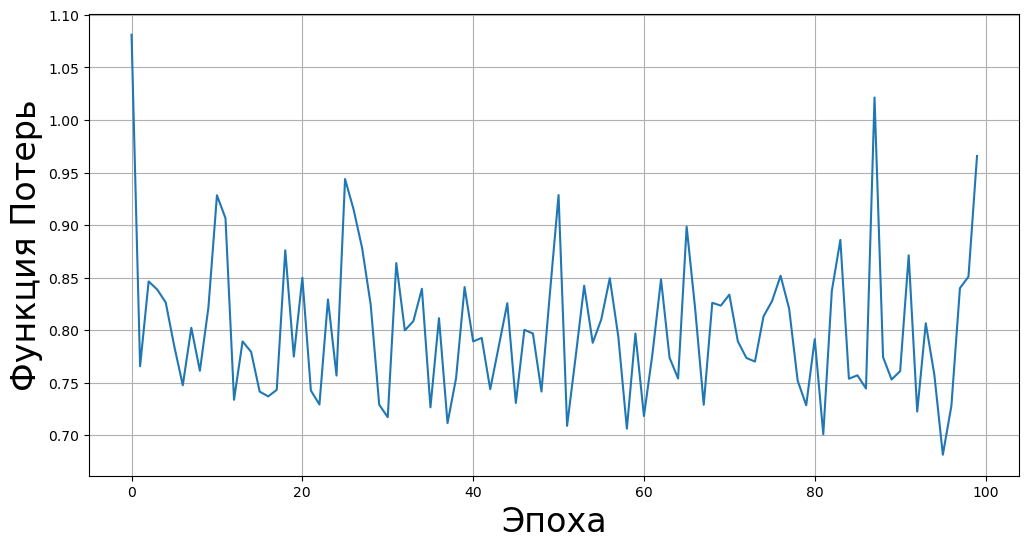

In [1008]:
regr_harm = LinearRegression(learning_rate=0.25,
                        epochs=100,batch_size=10,
                        n_batches=None)
regr_harm.fit(x_train, y_train)

print(f'Train Score = {regr_harm.score(x_train, y_train):.2f}')
regr_harm.plot_cost()

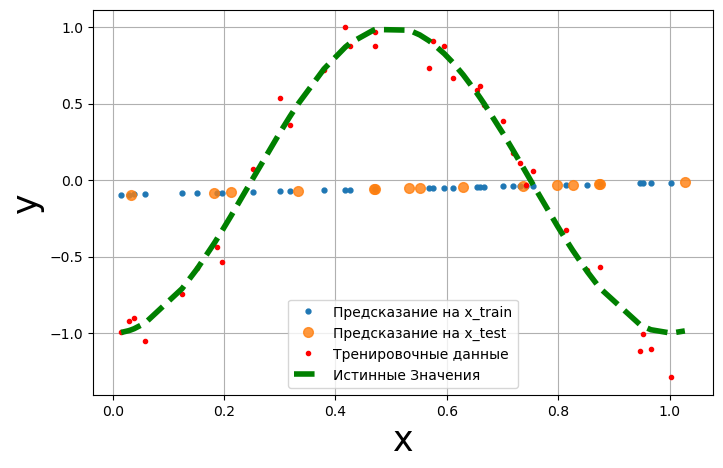

In [1009]:
fig  = plt.figure(figsize=(8,5))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_harm)

In [1010]:
w, b = regr_harm.get_w_and_b()
print(w,b)

[0.07977954] -0.09709152637521809


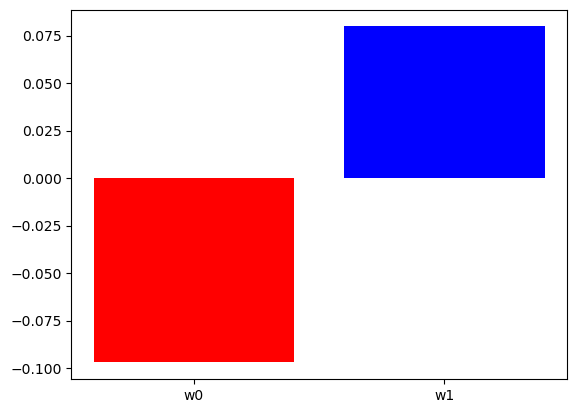

In [1011]:
vis_weigths(np.hstack([b,w]))

### Polinom regression

In [1012]:
# Data generation
order  = 10

x_train_ = to_polynom(x_train, order=order)
x_test_  = to_polynom(x_test,  order=order)


pd.DataFrame(x_train_).tail(4)

,0,1,2,3,4,5,6,7,8,9
31,0.251367,0.063186,0.015883,3.992418e-03,1.003564e-03,2.522632e-04,6.341076e-05,1.593940e-05,4.006646e-06,1.007140e-06
32,0.742091,0.550700,0.408670,3.032702e-01,2.250542e-01,1.670108e-01,1.239373e-01,9.197282e-02,6.825225e-02,5.064941e-02
33,0.028834,0.000831,0.000024,6.912492e-07,1.993165e-08,5.747142e-10,1.657145e-11,4.778254e-13,1.377774e-14,3.972707e-16
34,0.471606,0.222412,0.104891,4.946721e-02,2.332903e-02,1.100211e-02,5.188663e-03,2.447005e-03,1.154022e-03,5.442438e-04


Test Score = 0.36, Train Score = 0.70


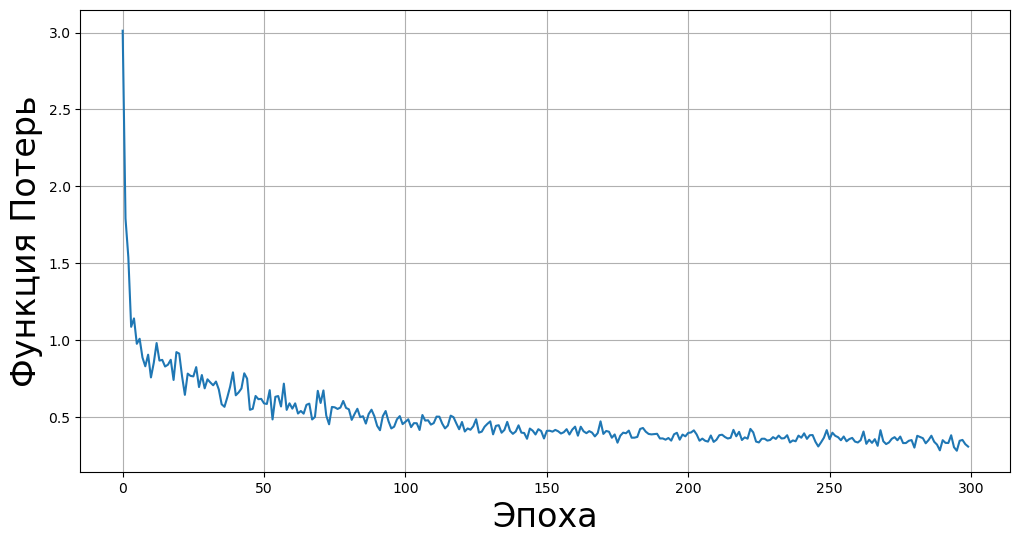

In [1013]:
regr_harm_poly = LinearRegression(learning_rate=0.05,
                        epochs=300,batch_size=25,
                        n_batches=None
                        )

regr_harm_poly.fit(x_train_, y_train)
print(f'Test Score = {regr_harm_poly.score(x_test_, y_test):.2f}, Train Score = {regr_harm_poly.score(x_train_, y_train):.2f}')
regr_harm_poly.plot_cost()

In [1014]:
w, b = regr_harm_poly.get_w_and_b()
print(w,b)

[ 1.89255848  0.22863796 -0.27522823 -0.27097631 -0.86883669 -0.80961259
 -0.13721966 -0.28407426 -0.56758568 -0.14766797] -0.567511485532541


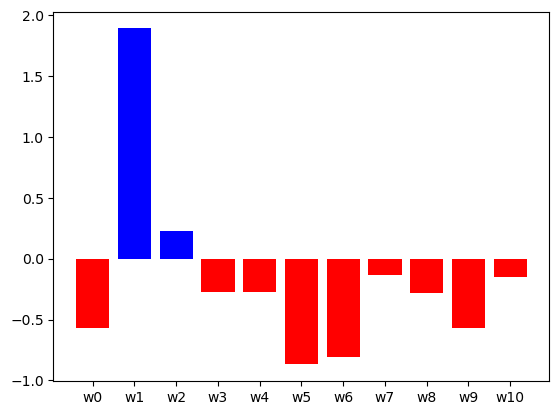

In [1015]:
vis_weigths(np.hstack([b,w]))

In [1016]:
np.sum(np.abs(w))

5.482397818624681

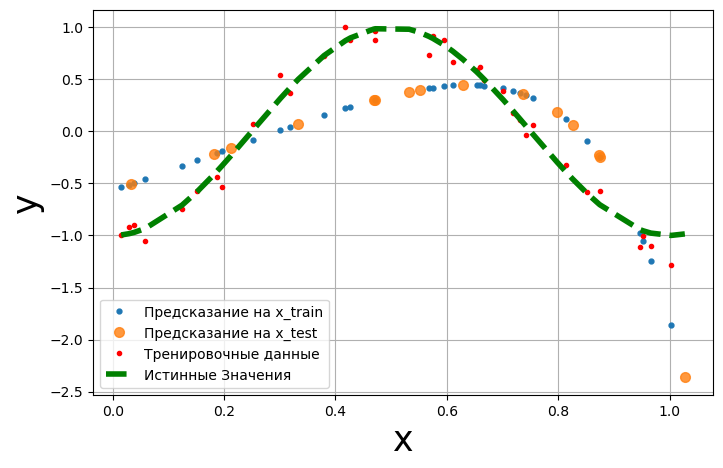

In [1017]:
plt.figure(figsize=(8,5))

plot_model_class(x_train_, y_train, x_test_, x, y_true, regr_harm_poly)

In [1018]:
# Normalization and standartization
class MinMaxScaler:
    def __init__(self):
        self.min = 0
        self.max = 0
    def fit(self,X):
        self.min = X.min(axis = 0)
        self.max = X.max(axis = 0)
        return self
    def transform(self,X):
        return (X- self.min)/(self.max-self.min)
    def fit_transform(self,X):
        return self.fit(X).transform(X)

In [1019]:
class StandardScaler:
    def __init__(self):
        self.mean = 0
        self.std = 1
    def fit(self,X):
        self.mean = X.mean(axis = 0)
        self.std = X.std(axis = 0)
        return self
    def transform(self,X):
        return (X- self.mean)/(self.std)
    def fit_transform(self,X):
        return self.fit(X).transform(X)

In [1020]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_)
x_test_scaled = scaler.transform(x_test_)

In [1021]:
pd.DataFrame(x_test_scaled).tail(4)

,0,1,2,3,4,5,6,7,8,9
11,1.187534,1.325642,1.332777,1.271042,1.174353,1.062111,0.945322,0.830154,0.720006,0.616672
12,-0.632242,-0.816272,-0.806892,-0.739322,-0.666392,-0.603622,-0.553151,-0.513251,-0.481577,-0.456095
13,0.366207,0.121619,-0.083836,-0.227962,-0.319915,-0.374109,-0.403002,-0.415731,-0.418523,-0.415450
14,0.936588,0.916348,0.801298,0.655202,0.507165,0.370159,0.249110,0.145039,0.057161,-0.016065


Test Score = 0.93, Train Score = 0.95


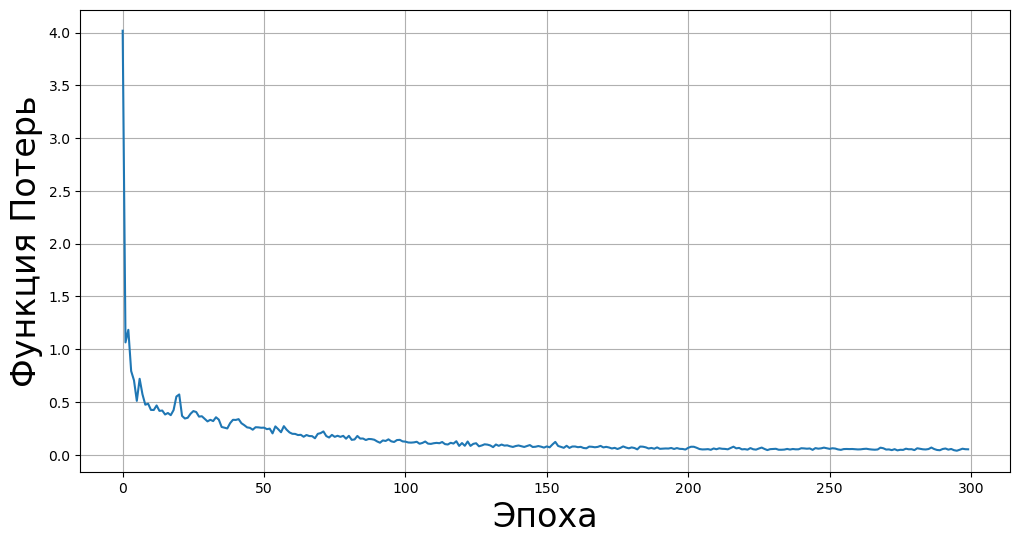

In [1022]:
regr_harm_poly_scale = LinearRegression(learning_rate=0.05,
                        epochs=300,batch_size=25,
                        n_batches=None
                        )

regr_harm_poly_scale.fit(x_train_scaled, y_train)
print(f'Test Score = {regr_harm_poly_scale.score(x_test_scaled, y_test):.2f}, Train Score = {regr_harm_poly_scale.score(x_train_scaled, y_train):.2f}')
regr_harm_poly_scale.plot_cost()


In [1023]:
w, b = regr_harm_poly_scale.get_w_and_b()
print(w,b)

[ 1.62093683 -0.26483535 -0.67084581 -0.4675549  -0.84451367 -0.58118696
  0.26462578  0.25882379  0.08718127  0.59434522] -0.04635925045076508


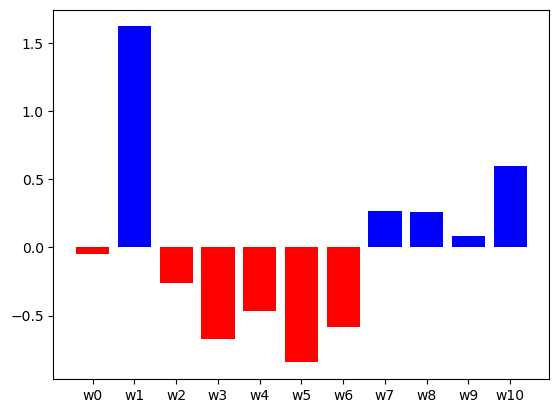

In [1024]:
vis_weigths(np.hstack([b,w]))

In [1025]:
np.sum(np.abs(w))

5.654849585366578

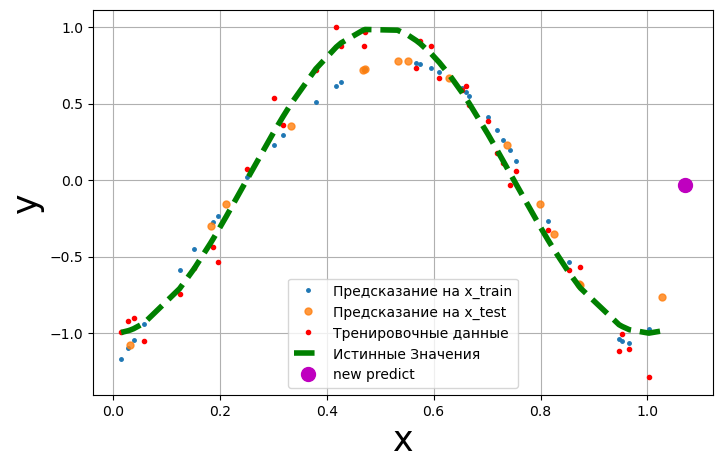

In [1026]:
plt.figure(figsize=(8,5))

plt.plot(x_train_[:,0], regr_harm_poly_scale.predict(x_train_scaled),
        '.', label='Предсказание на x_train',
        markersize = 5)
plt.plot(x_test[:,0], regr_harm_poly_scale.predict(x_test_scaled),
        'o', label='Предсказание на x_test',
        markersize = 5, alpha =0.8)
plt.plot(x_train_[:,0], y_train, '.',
        label="Тренировочные данные", linewidth=2,c='r')
plt.plot(x[:,0], y_true, '--',
        label="Истинные Значения", linewidth=4,c='g')

plt.plot([1.07], 
         regr_harm_poly_scale.predict(scaler.transform(to_polynom([1.07], order=order))), 
         'mo',  label = 'new predict',
        markersize = 10 )
plt.legend(fontsize=10); plt.grid()
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25);

In [1027]:
order = 10
x_train_ls = to_polynom(x_train, order=order, add_bias=True)
x_test_ls  = to_polynom(x_test,  order=order, add_bias=True)
weights  = np.linalg.lstsq(x_train_ls, y_train, rcond=None)[0] #including bias

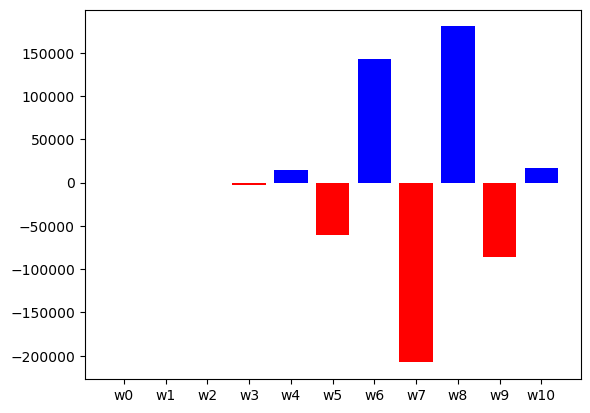

In [1028]:
vis_weigths(weights)

In [1029]:
def polyval(x,weights):
    return np.sum([np.power(x,i)*wi for i, wi in enumerate(weights) ],axis = 0) # including bias!

In [1030]:
print(f"Test score: {r2_score(y_test, polyval(x_test,weights).squeeze()):.2f}, Train score: {r2_score(y_train, polyval(x_train,weights).squeeze()):.2f}")

Test score: 0.97, Train score: 0.99


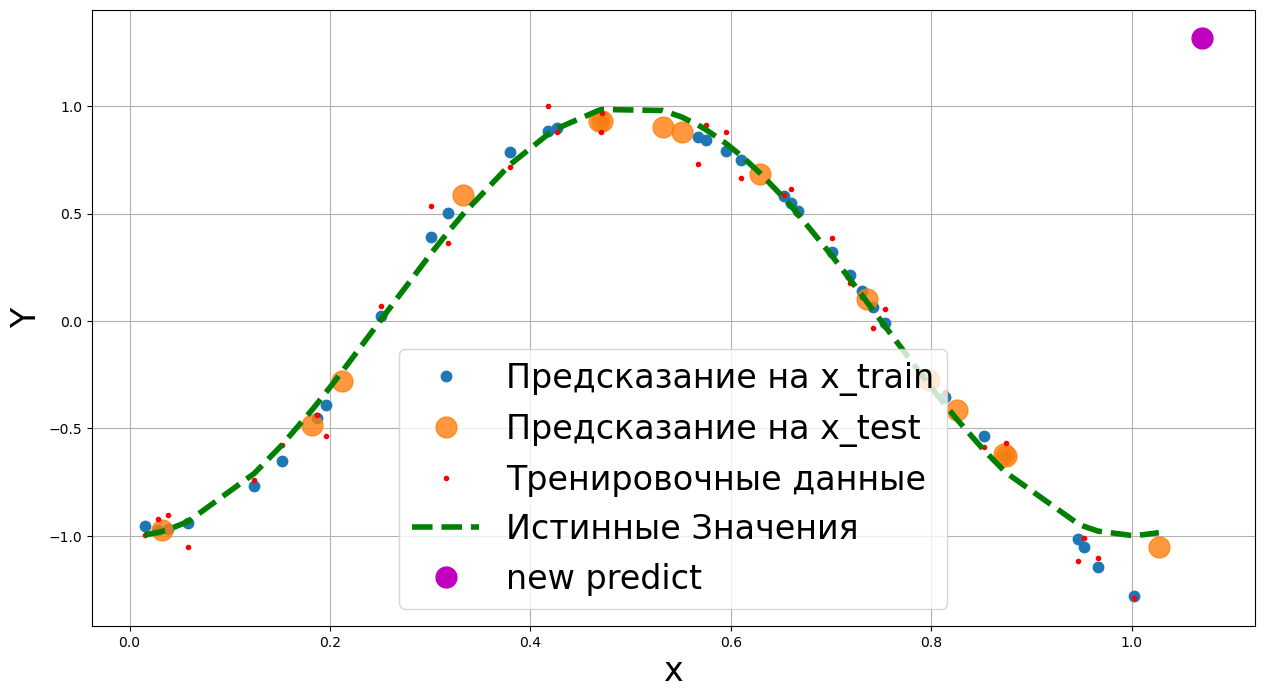

In [1031]:
plt.figure(figsize=(15,8))

plt.plot(x_train_[:,0], polyval(x_train, weights),
        '.', label='Предсказание на x_train',
        markersize = 15)
plt.plot(x_test[:,0], polyval(x_test, weights),
        'o', label='Предсказание на x_test',
        markersize = 15, alpha =0.8)
plt.plot(x_train_[:,0], y_train, '.',
        label="Тренировочные данные", linewidth=2,c='r')
plt.plot(x[:,0], y_true, '--',
        label="Истинные Значения", linewidth=4,c='g')

plt.plot([1.07], 
         polyval([1.07], weights), 
         'mo',  label = 'new predict',
        markersize = 15 )

plt.grid()
plt.legend(fontsize = 24)
plt.xlabel('x', fontsize = 24)
plt.ylabel('Y', fontsize = 24)
plt.show()

### Ridge regression

In [1032]:
class RidgeRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 n_batches    = None,
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l2_penalty = l2_penalty
        
    #---------------------------------
    def loss(self,yhat, y):   
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term

    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.mean(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)  

Test Score = 0.93, Train Score = 0.95


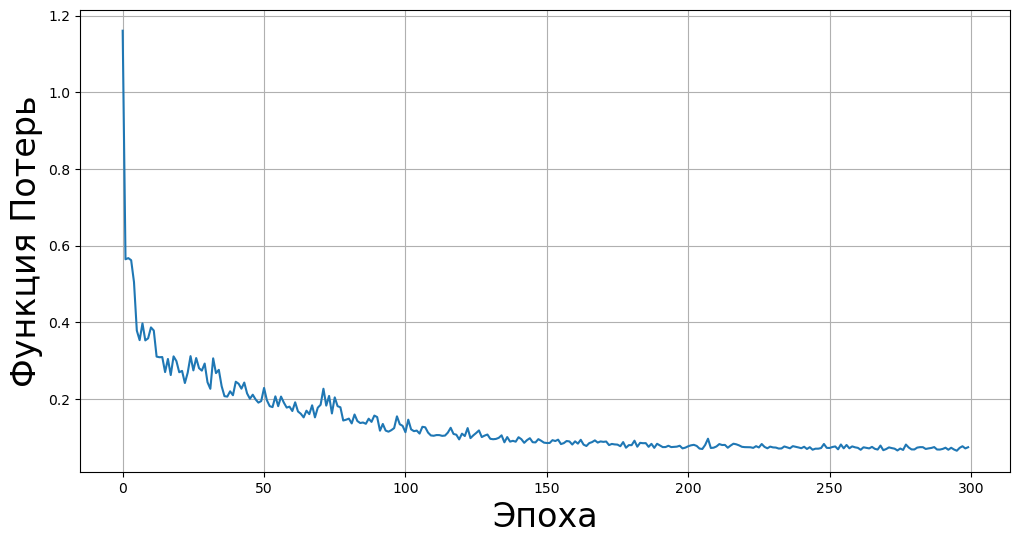

In [1033]:
regr_l2 = RidgeRegression(learning_rate=0.25,
                       epochs=300, batch_size=10,
                       l2_penalty = 0.001)
regr_l2.fit(x_train_, y_train)

print(f'Test Score = {regr_l2.score(x_test_, y_test):.2f}, Train Score = {regr_l2.score(x_train_, y_train):.2f}')
regr_l2.plot_cost()

In [1034]:
w, b = regr_l2.get_w_and_b()
print(w,b)

[ 5.18948449 -0.5846487  -2.45901597 -2.29439495 -2.17391568 -1.28173394
  0.16579239  0.68212826  0.94381397  1.80253197] -1.2017003796439225


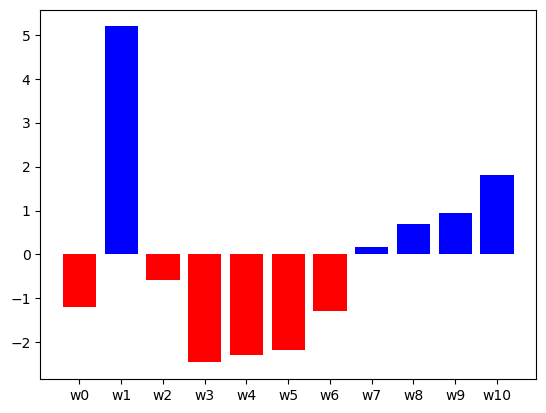

In [1035]:
vis_weigths(np.hstack([b,w]))

In [1036]:
np.sum(np.abs(w))

17.57746034192686

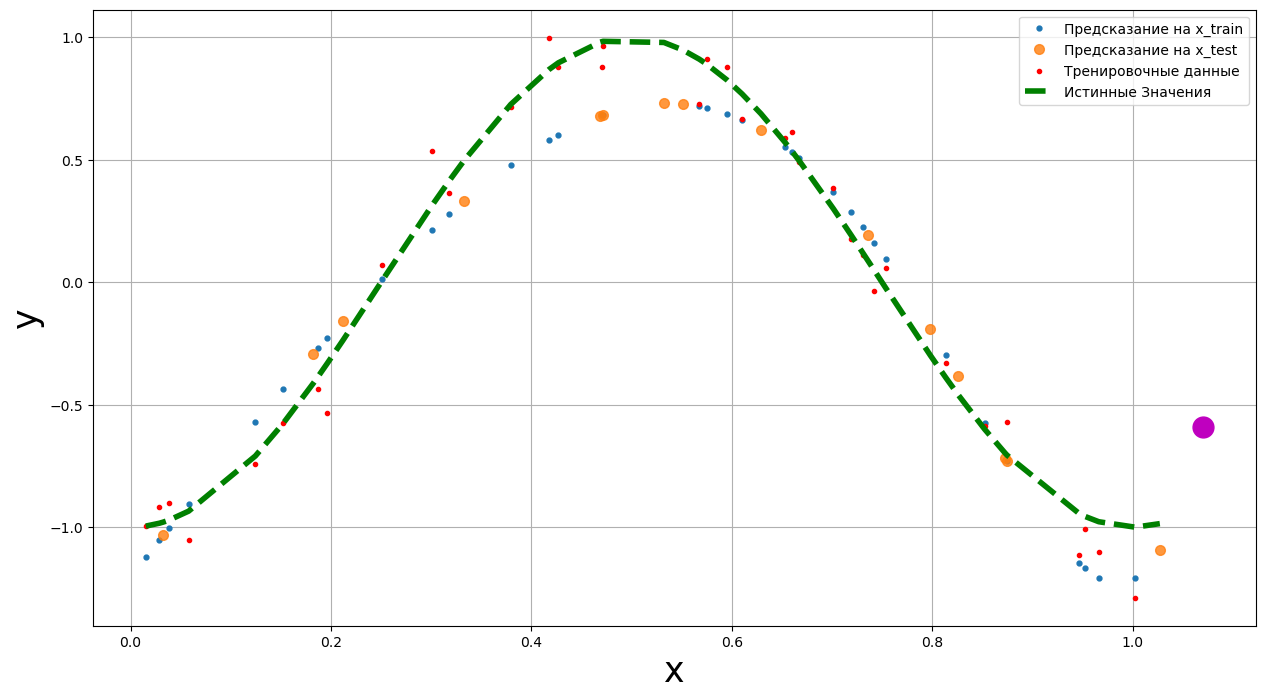

In [1037]:
plt.figure(figsize=(15,8))

plot_model_class(x_train_, y_train, x_test_, x, y_true, regr_l2)

plt.plot([1.07], 
         regr_l2.predict(to_polynom([1.07], order=order)) ,
         'mo',  label = 'new predict',
        markersize = 15 );

### Lasso regression

In [1038]:
class LassoRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
    
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(np.abs(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term
                  
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty)

Test Score = 0.75, Train Score = 0.87


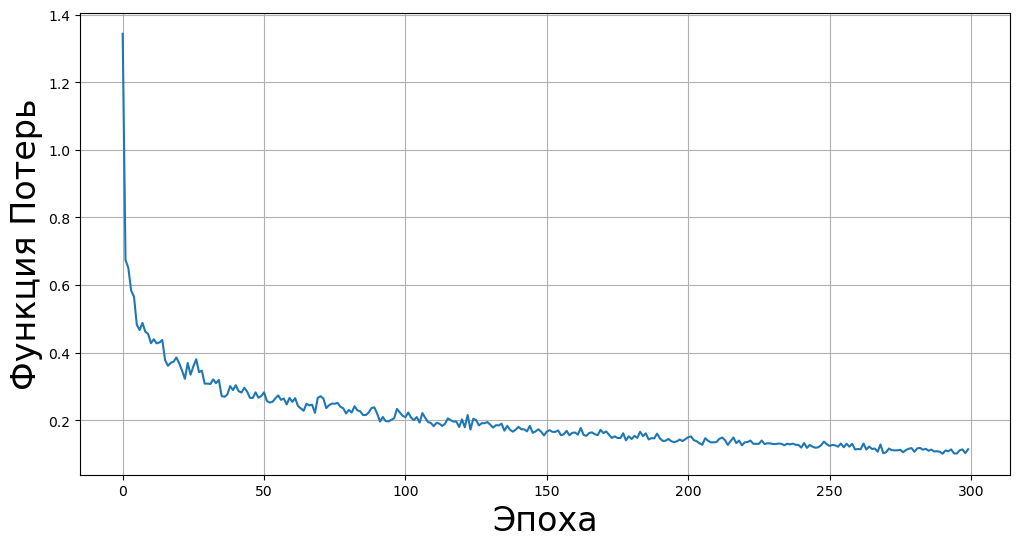

In [1039]:
regr_l1 = LassoRegression(learning_rate=0.1,
                       epochs=300,batch_size=10,
                       l1_penalty = 0.001)
regr_l1.fit(x_train_, y_train)

print(f'Test Score = {regr_l1.score(x_test_, y_test):.2f}, Train Score = {regr_l1.score(x_train_, y_train):.2f}')
regr_l1.plot_cost()

In [1040]:
w, b = regr_l1.get_w_and_b()
print(w,b)

[ 3.63525399 -0.20140583 -1.35295993 -1.32594472 -1.54370133 -1.05078643
  0.0125667   0.17510311  0.2323849   0.8287575 ] -0.912452312344119


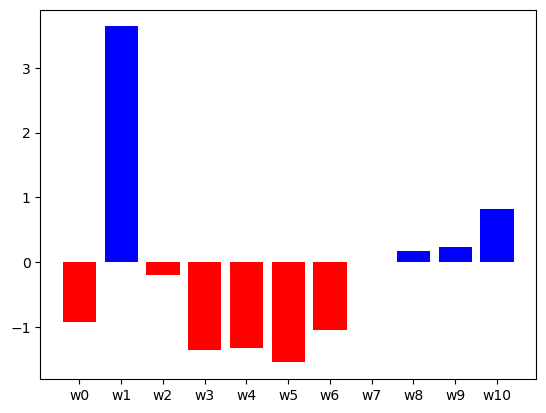

In [1041]:
vis_weigths(np.hstack([b,w]))

In [1042]:
np.sum(np.abs(w))

10.35886442781898

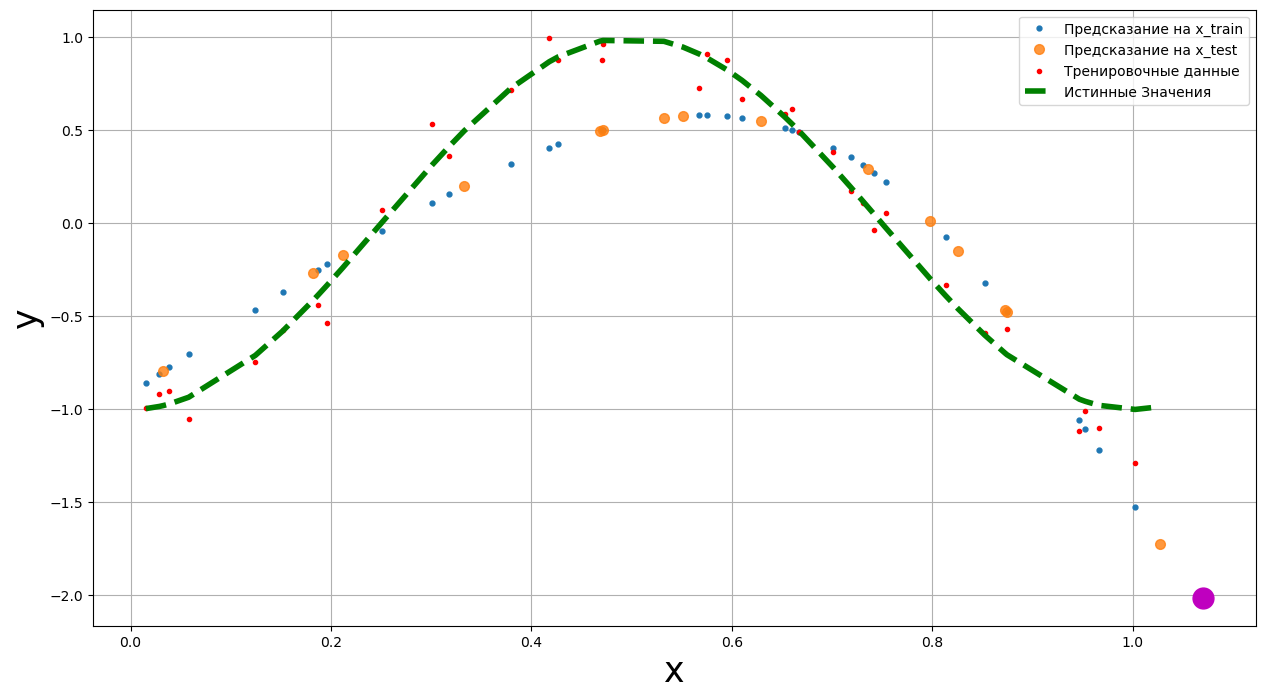

In [1043]:
plt.figure(figsize=(15,8))

plot_model_class(x_train_, y_train, x_test_, x, y_true, regr_l1)

plt.plot([1.07], 
         regr_l1.predict(to_polynom([1.07], order=order)) ,
         'mo',  label = 'new predict',
        markersize = 15 );

### Elastic regression

In [1044]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 n_batches    = None,
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
        
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(np.abs(self.weights[1:]))
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad +  np.sign(self.weights)*self.l1_penalty + l2_term)

Test Score = 0.77, Train Score = 0.88


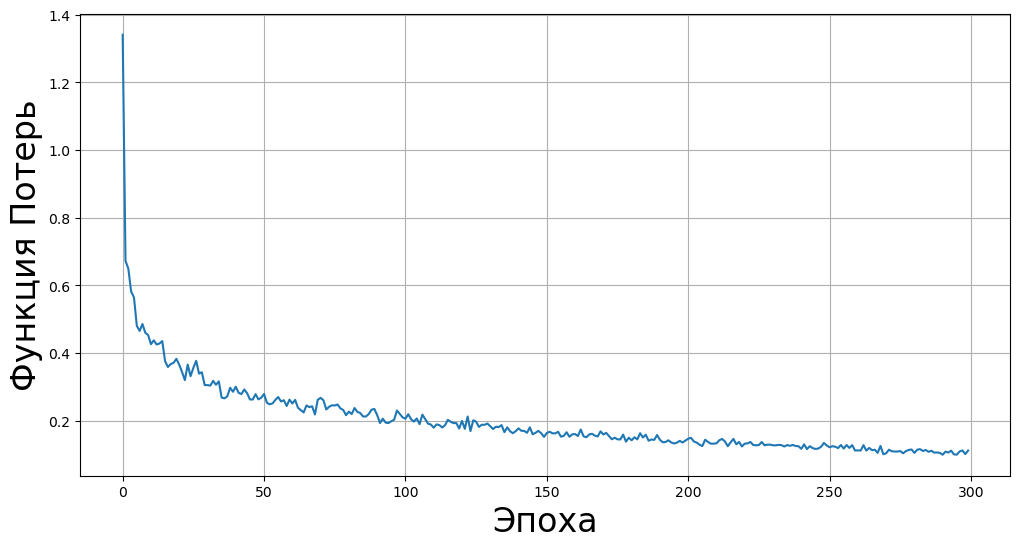

In [1045]:
regr_l1l2 = ElasticRegression(learning_rate=0.1,
                         epochs=300,batch_size=10,
                         l1_penalty = 0.0001,l2_penalty = 0.001 )
regr_l1l2.fit(x_train_, y_train)

print(f'Test Score = {regr_l1l2.score(x_test_, y_test):.2f}, Train Score = {regr_l1l2.score(x_train_, y_train):.2f}')
regr_l1l2.plot_cost()

In [1046]:
w, b = regr_l1l2.get_w_and_b()
print(w,b)

[ 3.70081907e+00 -1.94040592e-01 -1.42188822e+00 -1.35692447e+00
 -1.58901584e+00 -1.09249292e+00 -1.14548106e-03  2.16829663e-01
  2.53082698e-01  9.29688101e-01] -0.9245149505936405


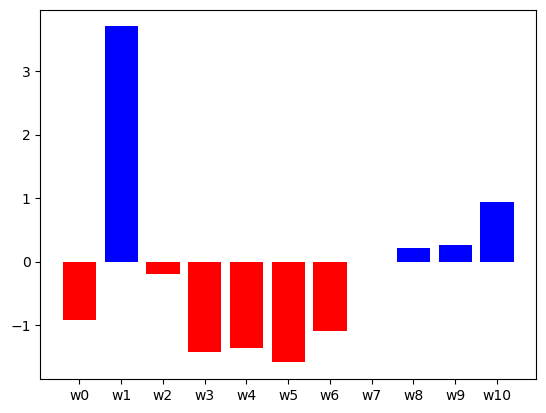

In [1047]:
vis_weigths(np.hstack([b,w]))

In [1048]:
np.sum(np.abs(w))

10.755927048650623

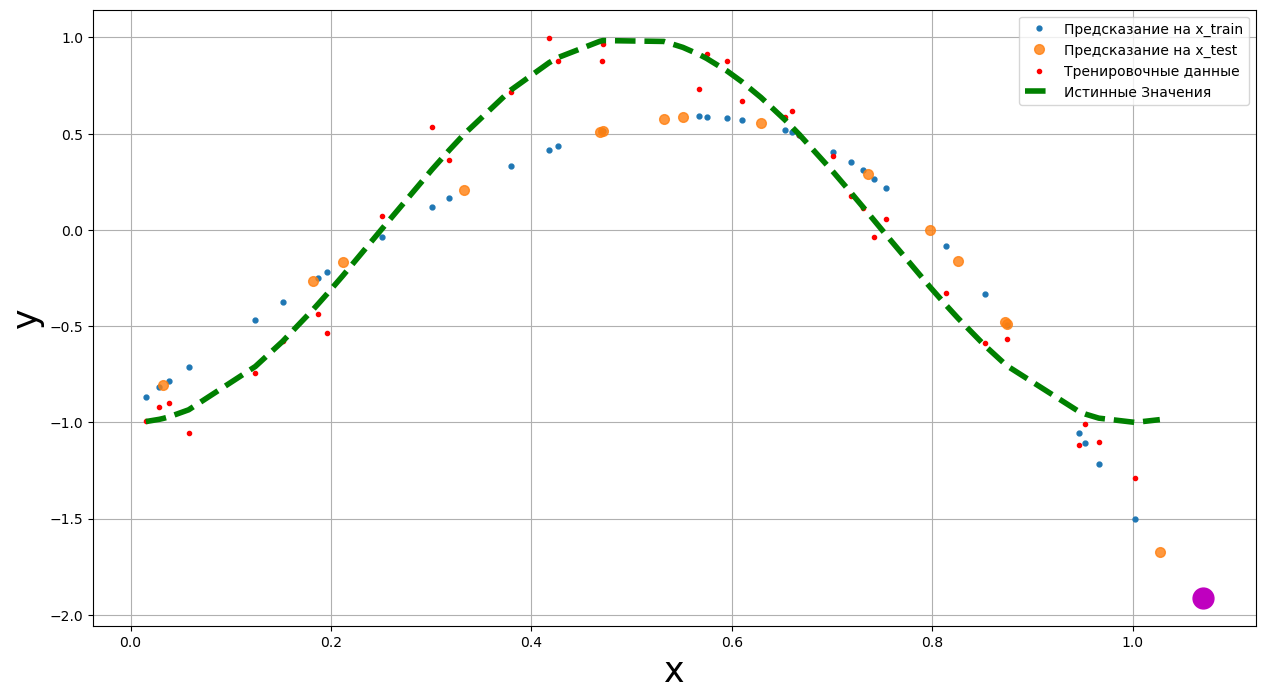

In [1049]:
plt.figure(figsize=(15,8))

plot_model_class(x_train_, y_train, x_test_, x, y_true, regr_l1l2)

plt.plot([1.07], 
         regr_l1l2.predict(to_polynom([1.07], order=order)) ,
         'mo',  label = 'new predict',
        markersize = 15 );

## Задание 1

### Набор 1

#### Data generation

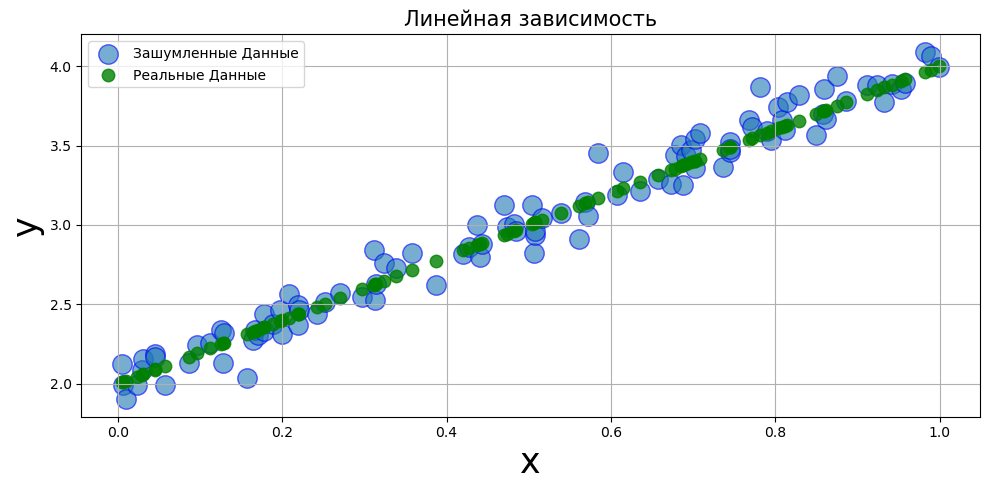

In [1073]:
noise_power = 0.1

y, y_true, x = dataset(a = 2, b = 2,
                       f = None,  N = 100,
                       x_max =1, 
                       noise_power = noise_power,
                       seed = 22)
vis_data(y, y_true,x, 'Линейная зависимость')

In [1074]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, ) 

regr_poly_lin = LinearRegression(learning_rate=0.1,
                        epochs=10,batch_size=10,
                        n_batches=None)
regr_poly_lin.fit(x_train, y_train)   

#### Полиномы

##### Полином 1й степени

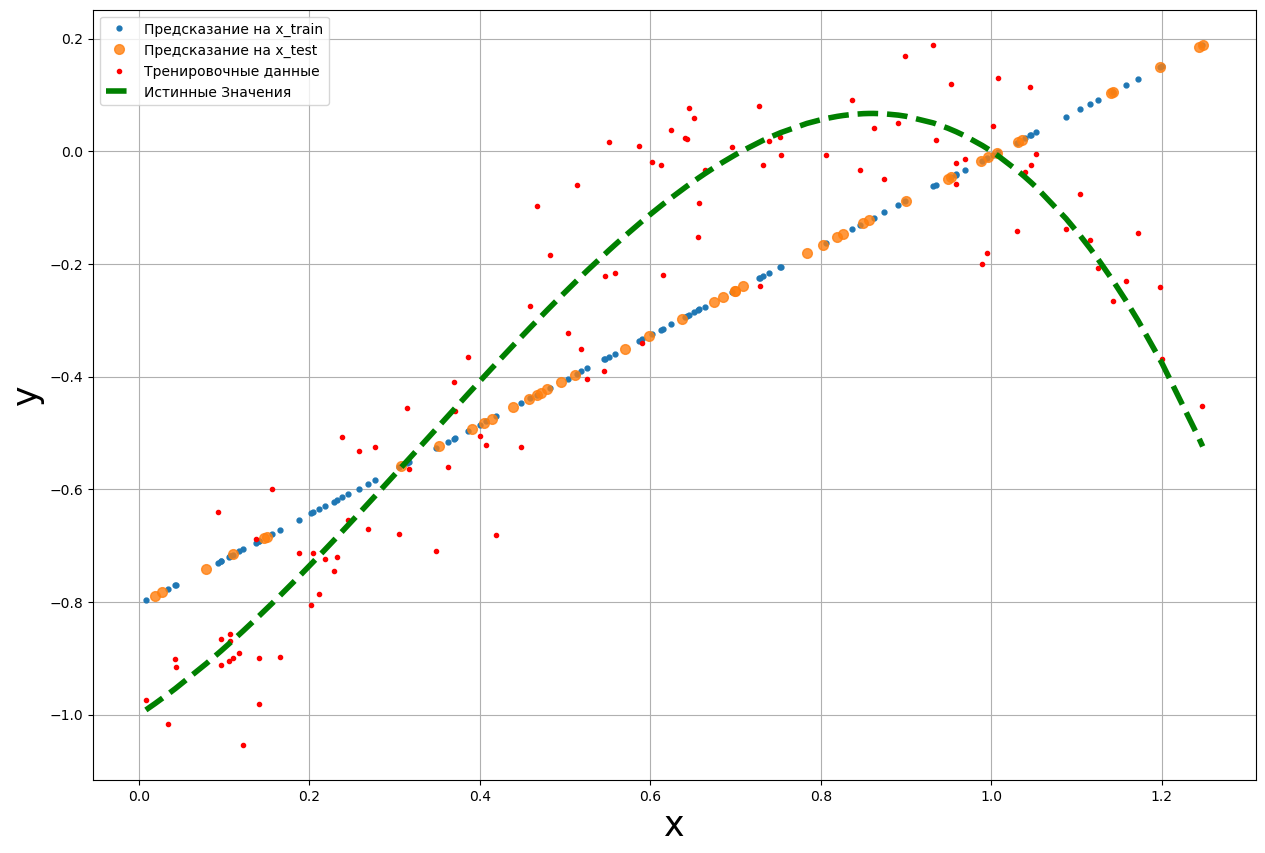

In [1107]:
x_ = to_polynom(x, order = 1) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Прям хорошо (логично, 1я степень же)

##### Полином 4й степени

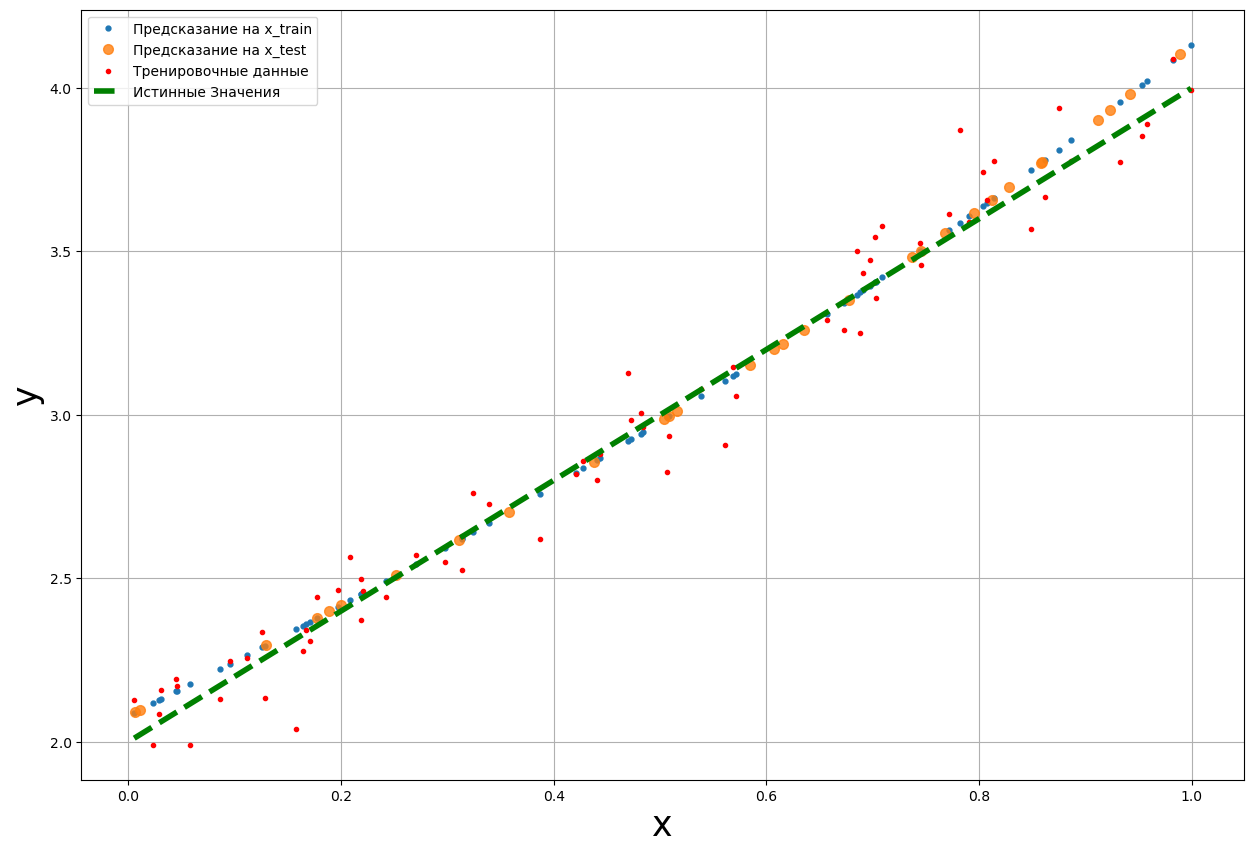

In [1080]:
x_ = to_polynom(x, order = 4) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Немного хуже, насколько видно из графика. Возникают неточности при описании

##### Вывод по полиномам

1 степень лучше всего подходит для описания линейной зависимости.

### Набор 2

#### Data generation

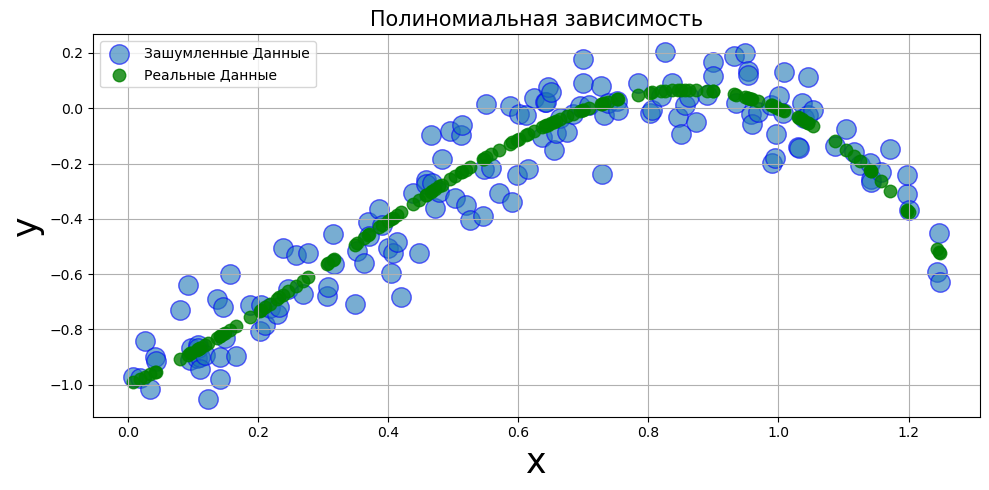

In [1096]:
noise_power = 0.1 # Усилим шумы

y, y_true, x = dataset(a = [1,2,-2], b = -1,
                       f = None,  N = 150, # меньше зашумленных точек
                       x_max =1.25, 
                       noise_power = noise_power,
                       seed = 25) # Поменяю сид
vis_data(y, y_true,x, 'Полиномиальная зависимость')

In [1097]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, ) 

regr_poly_lin = LinearRegression(learning_rate=0.1,
                        epochs=10,batch_size=10,
                        n_batches=None)
regr_poly_lin.fit(x_train, y_train)   

#### Полиномы

##### Полином 1й степени

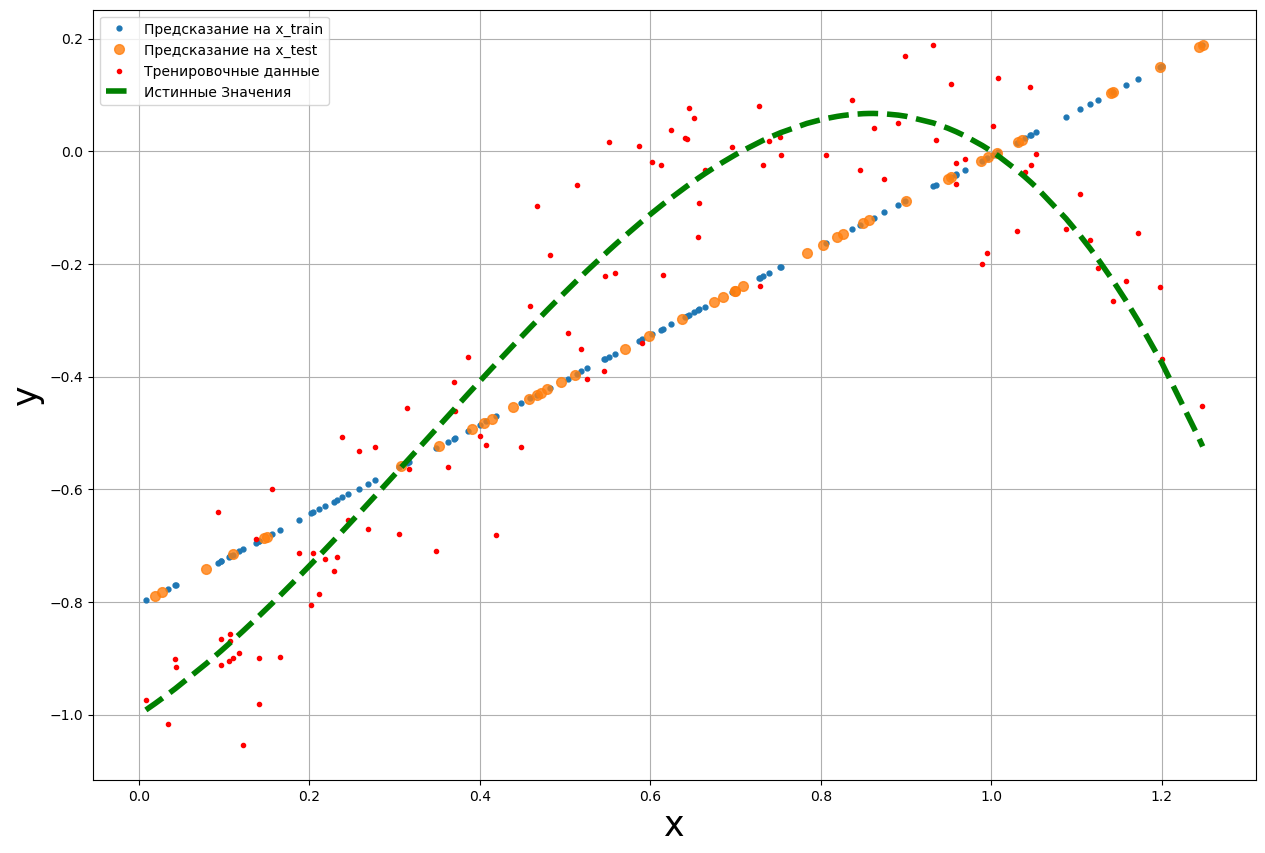

In [1098]:
x_ = to_polynom(x, order = 1) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Ну вообще неоч. В небольшоим промежутке неплохо описывает значения, но в целом - плохо.

##### Полином 3й степени

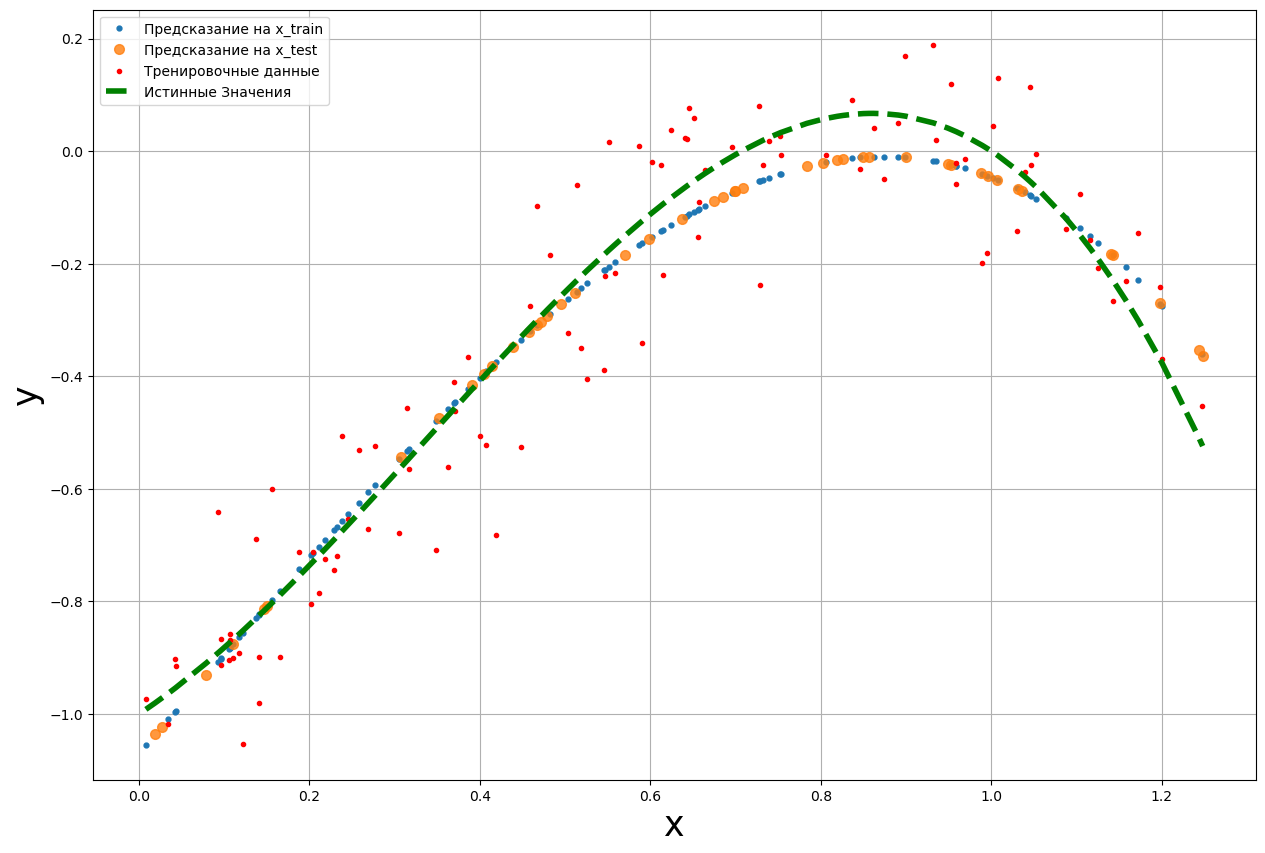

In [1105]:
x_ = to_polynom(x, order = 3) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Уже значительно лучше описывает зависимость, но все равно есть неточности.

##### Полином 4й степени

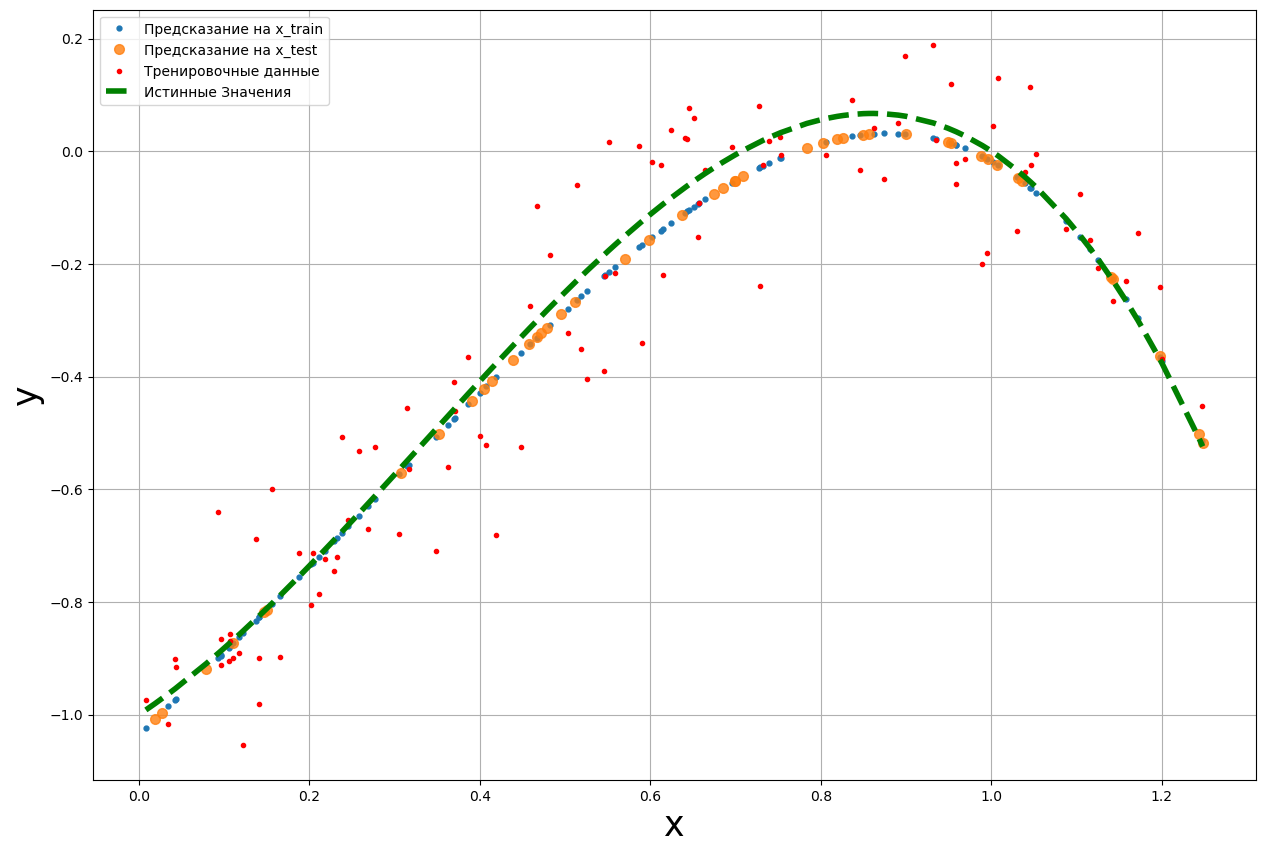

In [1104]:
x_ = to_polynom(x, order = 4) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Полином 4й степени еще лучше описывает данную зависимость.

##### Полином 6й степени

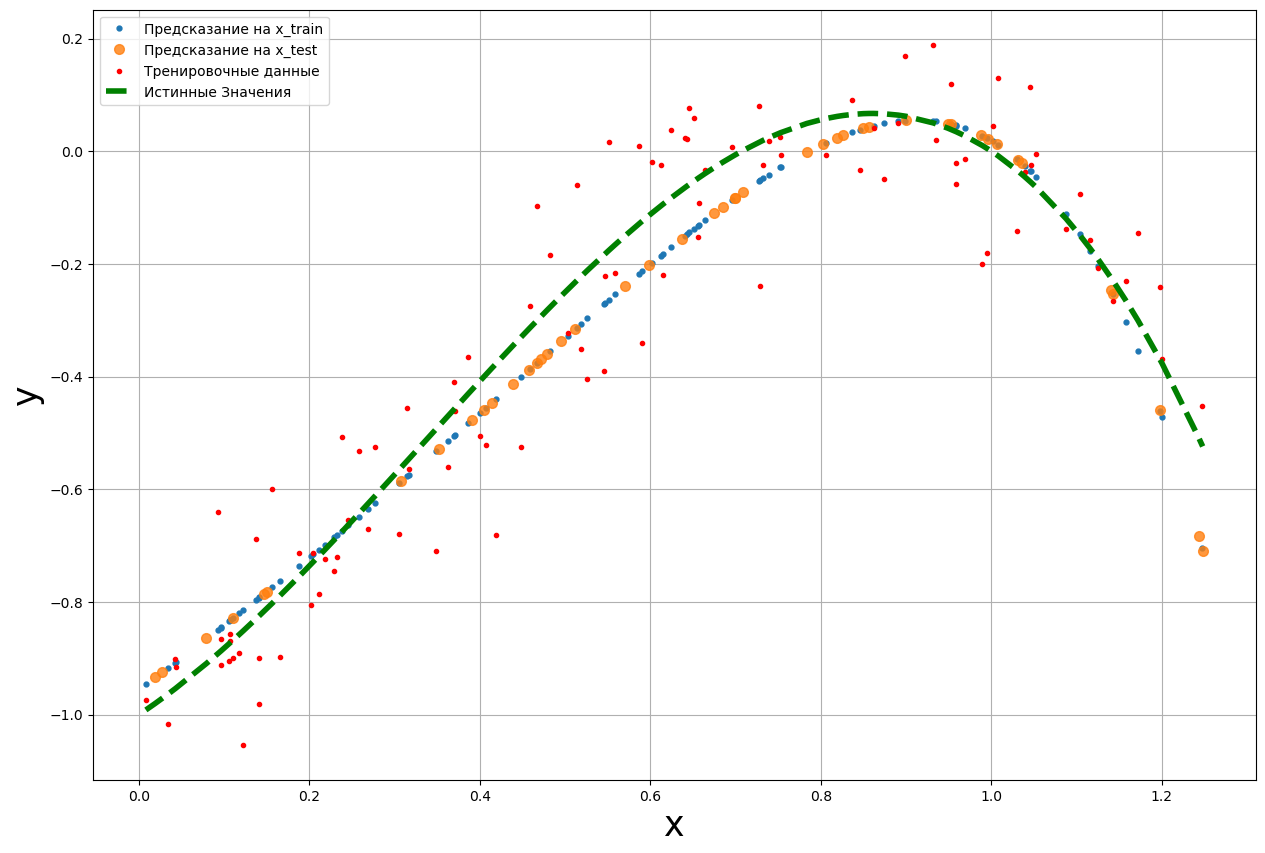

In [1106]:
x_ = to_polynom(x, order = 6) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Здесь уже степень большевата. Полином стал хуже описывать зависимость.

##### Вывод по полиномам

Лучше всего полиномиальную зависимость описал полином 4й степени. 1я степень - прямая, а 6я - перебарщивает и смещает максимум функции

### Набор 3

#### Data generation

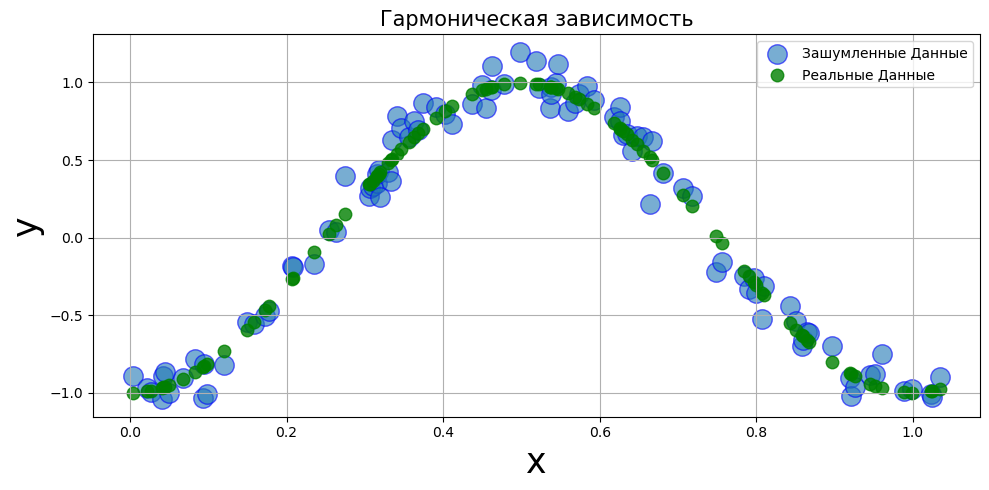

In [1110]:
y, y_true, x = dataset(a = 2*np.pi,
                       b = np.pi, f = np.cos,  
                       N = 100, x_max =np.pi/3, # Увеличил количество шумов
                       noise_power = 0.1, seed = 10) # Изменил сид
vis_data(y, y_true,x, 'Гармоническая зависимость')

In [1111]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, ) 

regr_poly_lin = LinearRegression(learning_rate=0.1,
                        epochs=10,batch_size=10,
                        n_batches=None)
regr_poly_lin.fit(x_train, y_train)   

#### Полиномы

##### Полином 1й степени

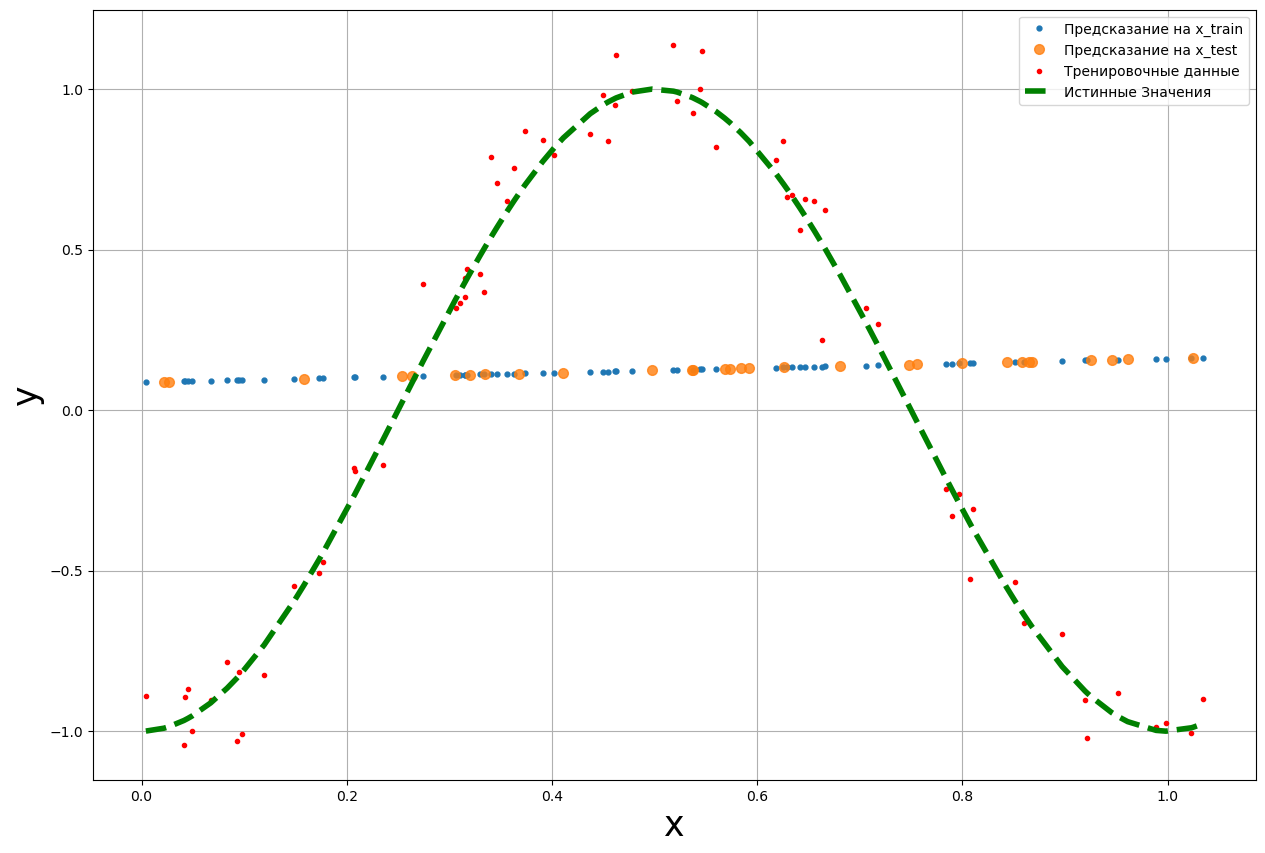

In [1112]:
x_ = to_polynom(x, order = 1) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Полином 1й степени плохо описывает гармоническую зависимость.

##### Полином 3й степени

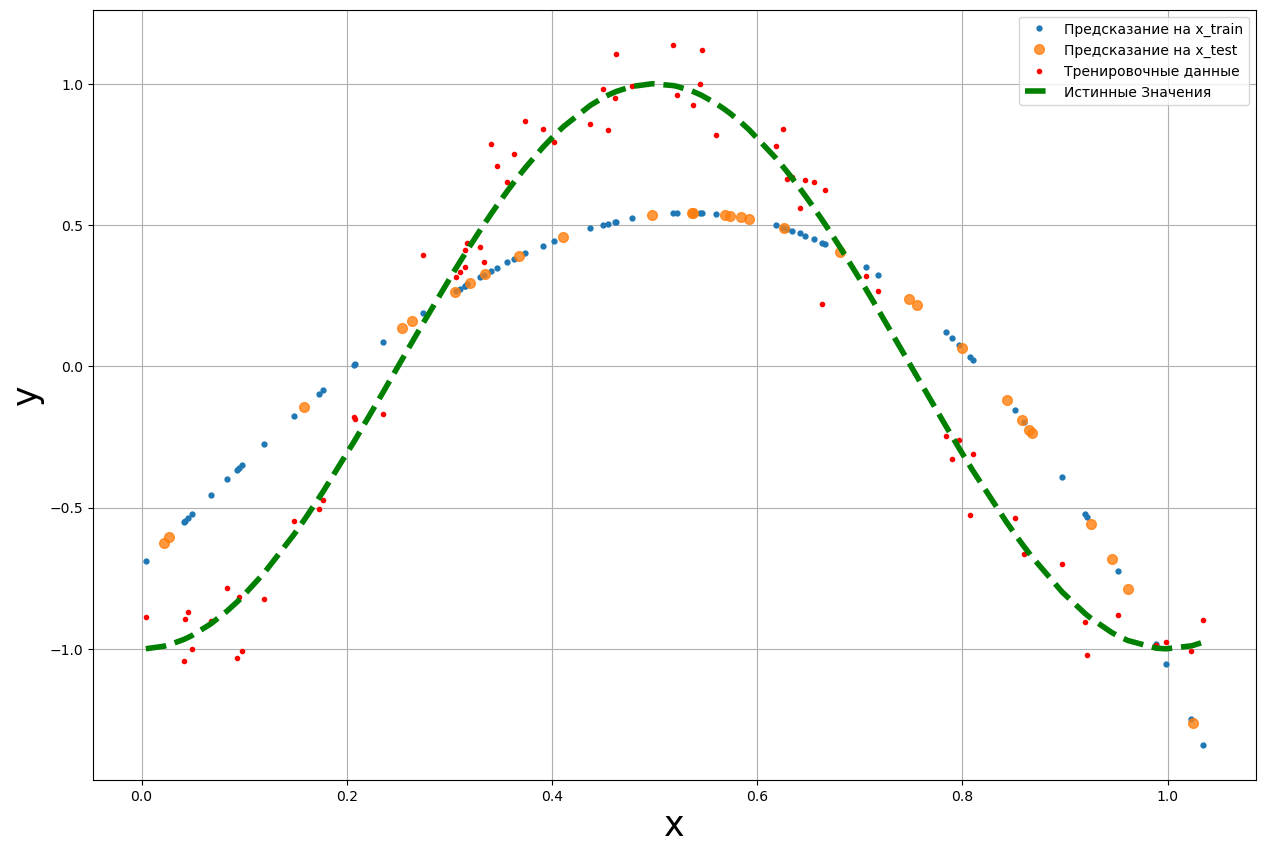

In [1113]:
x_ = to_polynom(x, order = 3) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Полином 3й степени описывает гармоническую зависимость значительно лучше полинома 1й степени (логично)

##### Полином 4й степени

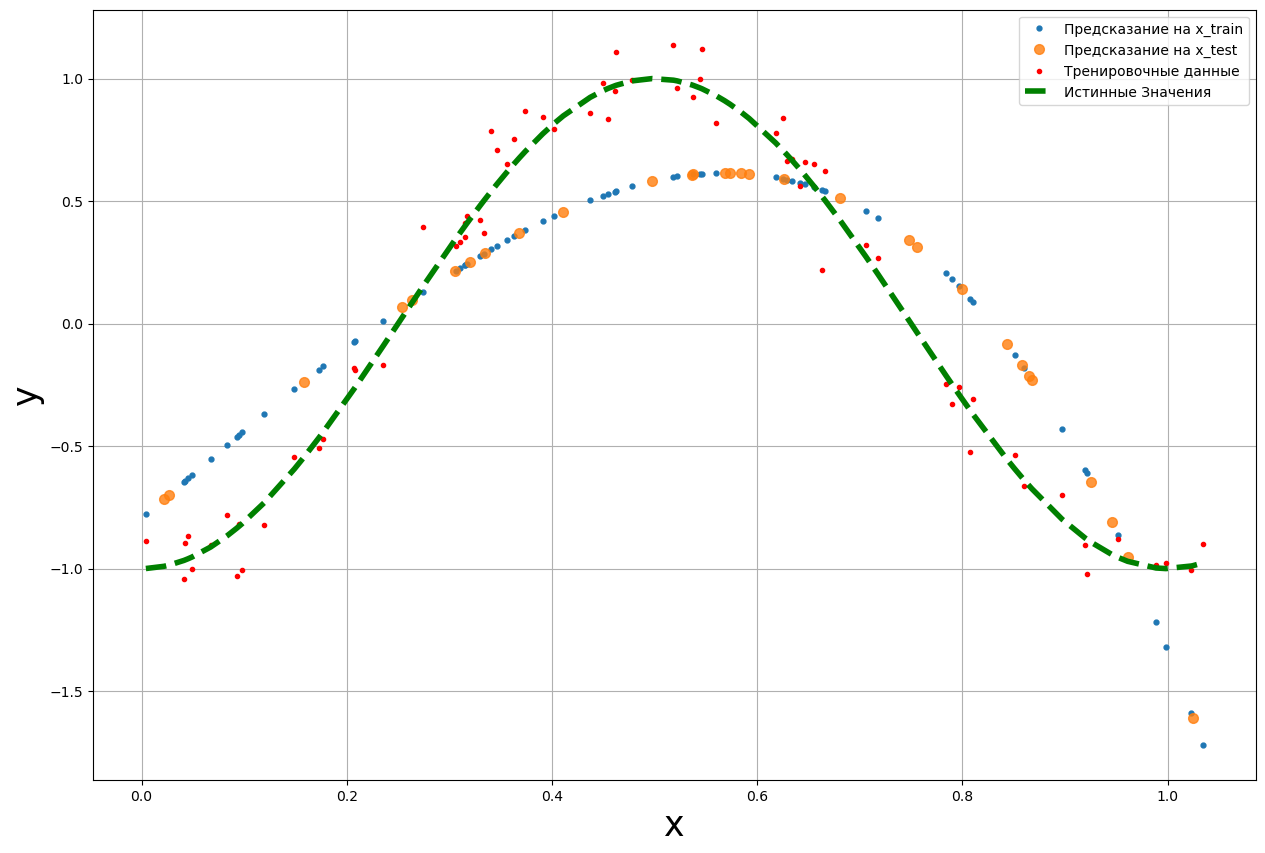

In [1114]:
x_ = to_polynom(x, order = 4) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Полином 4й степени плоховато описывает зависимость и усиливает смещение максимума вправо больше, чем полином 3й степени

##### Полином 6й степени

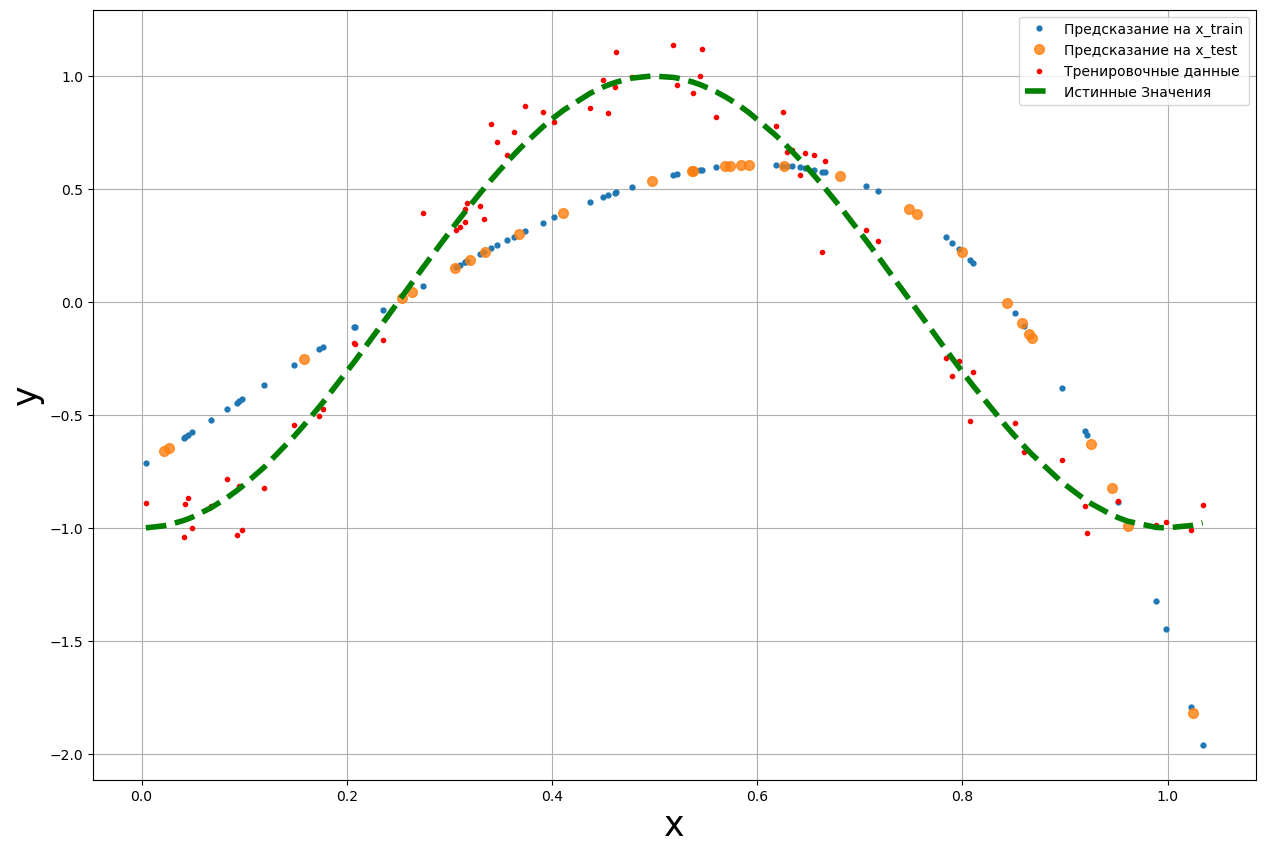

In [1115]:
x_ = to_polynom(x, order = 6) 
x_train, y_train,  x_test, y_test = train_test_split(x_, y,  test_size=0.3, )

regr_poly = LinearRegression(learning_rate=0.1,
                        epochs=100,batch_size=10,
                        n_batches=None)

regr_poly.fit(x_train, y_train)

fig  = plt.figure(figsize=(15,10))

plot_model_class(x_train, y_train, x_test, x, y_true, regr_poly)

Аналогично 4й степени

##### Выводы по полиномам

Все полиномы с заданными параметрами обучения не способны хорошо описать гармоническую зависимость в том виде, который имеется.